# Machine Learning HW 2
## Andrew Mao
Note: Some code below and in ML_Toolbox are derived and based on https://github.com/yhat/DataGotham2013/tree/master/notebooks

Goal: The goal of this assignment is to build a simple, modular, extensible, machine learning pipeline in Python. The pipeline should have functions that can do the following tasks:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('./ML_Toolbox')

In [2]:
from Pipeline1_read import read
from Pipeline2_explore import explore
from Pipeline3_preprocess import fill_miss
from Pipeline4_features import display_importance, discretize, gen_dummies
from Pipeline5_classifier import classify
from Pipeline6_evaluate import evaluate, plot_roc

C:\Users\Andrew Mao\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 1. Read/Load Data

In [3]:
# Read data file into pandas dataframe
data = read('data2/credit-data.csv')

## Step 2. Explore Data

In [4]:
# Peek at columns to understand potential features and labels
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
# Peek at how data is set up
data.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# Our dependent variable (label) is 'SeriousDlqin2yrs'
# Our independent variables (features) are all column names other 
# than 'PersonID' and the label

label = 'SeriousDlqin2yrs'
features = list(data.drop(['PersonID', label], axis=1).columns)

In [7]:
# Explore the describe function with each column

for col in data.columns:
    explore(data, col)

----------------------------------------
Describe Column: PersonID
count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: PersonID, dtype: float64
Unique values: 150000
----------------------------------------
Describe Column: SeriousDlqin2yrs
count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64
Unique values: 2
----------------------------------------
Describe Column: RevolvingUtilizationOfUnsecuredLines
count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
Unique values: 125728
---------------------

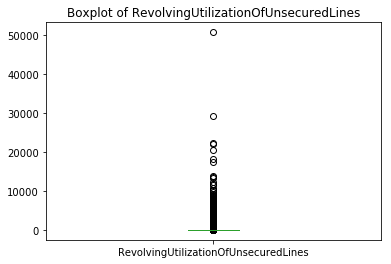

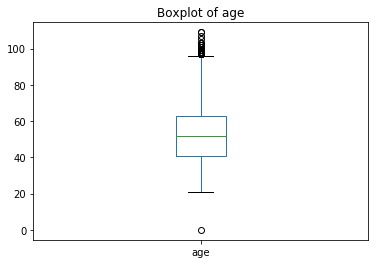

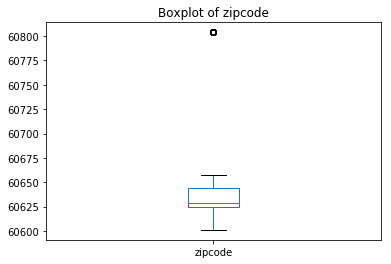

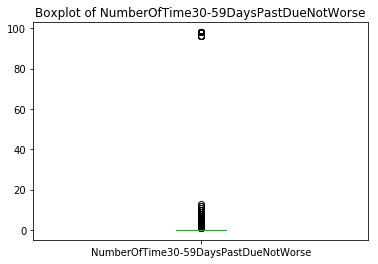

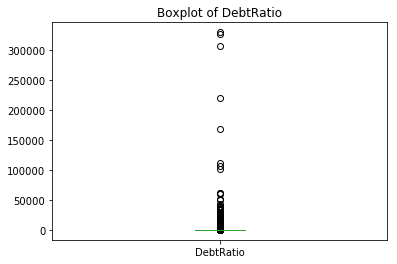

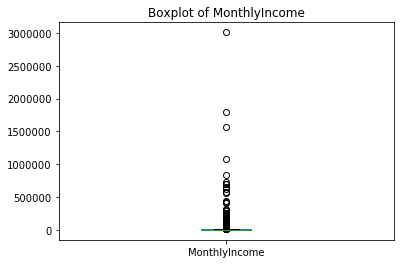

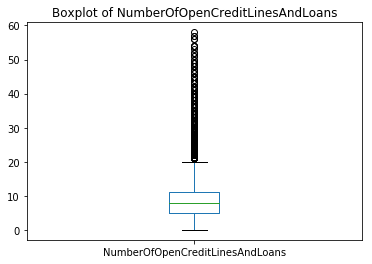

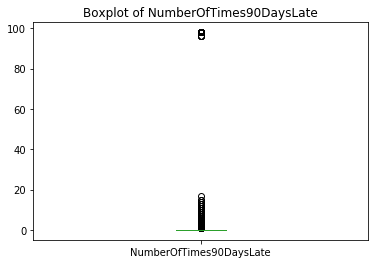

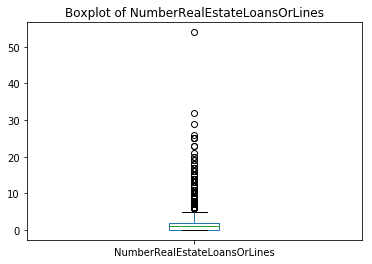

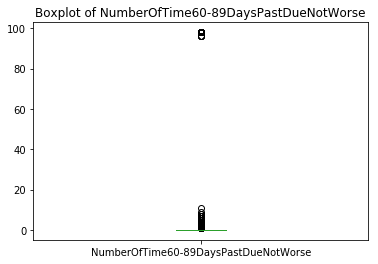

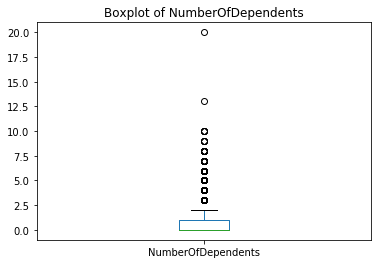

In [8]:
# Boxplot to observe quartiles and possible outliers

for col in features:
    plt.figure()
    data[col].plot('box')
    plt.title('Boxplot of ' + col)

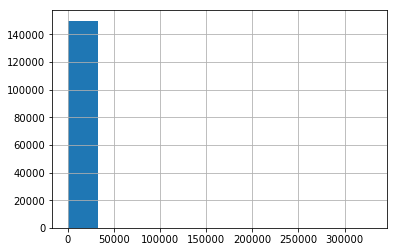

In [9]:
data['DebtRatio'].hist()

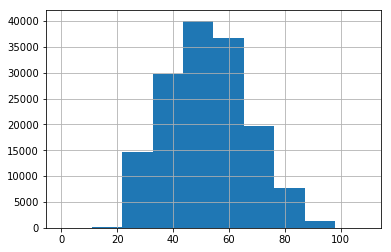

In [10]:
data['age'].hist()

## Step 3. Pre-Process and Clean Data

In [6]:
y = data['SeriousDlqin2yrs'] # label (dependent variable)
X = data[features] # features 

In [12]:
# Which columns have missing values?

for col in X.columns:
    if any(X[col].isnull()) == True:
        print(col)

MonthlyIncome
NumberOfDependents


In [7]:
# We observed possible outliers in Debt Ratio. Let's get rid of them

data['DebtRatio'].loc[data['DebtRatio'] > 10000] = None

C:\Users\Andrew Mao\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


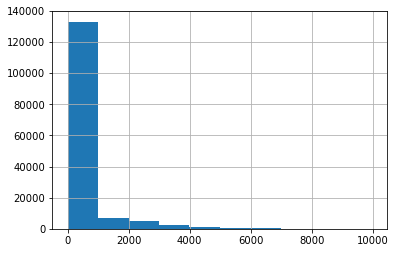

In [14]:
data['DebtRatio'].hist()

That looks like we eliminated a good amount of outliers.

In [8]:
# Fill missing columns with mean (as dictated in assignment)

for df in [data, X]:
    for col in ['MonthlyIncome', 'NumberOfDependents', 'DebtRatio']:
        df = fill_miss(df, col)

./ML_Toolbox\Pipeline3_preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].fillna(df[col].mean())


In [16]:
# Check missing values again

for col in X.columns:
    if any(X[col].isnull()) == True:
        print(col)

Great!

## Step 4. Generate Features/Predictors

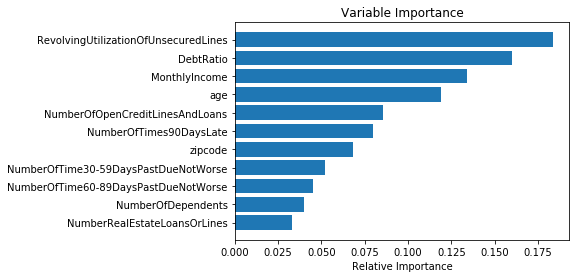

In [9]:
display_importance(data, label, features)

In [10]:
discretize(data, 'MonthlyIncome', 5)
discretize(data, 'DebtRatio', 5)
discretize(data, 'age', 5)

In [11]:
DebtRatio_dummy = gen_dummies(data,'DebtRatio_bucket')
MonthlyIncome_dummy = gen_dummies(data,'MonthlyIncome_bucket')
Age_dummy = gen_dummies(data,'age_bucket')

In [12]:
gen_dummies(data,'DebtRatio_bucket')
gen_dummies(data,'MonthlyIncome_bucket')
gen_dummies(data,'age_bucket')

In [13]:
data.dtypes

PersonID                                   int64
SeriousDlqin2yrs                           int64
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
zipcode                                    int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
MonthlyIncome_bucket                    category
DebtRatio_bucket                        category
age_bucket                              category
DebtRatio_bucket_0                          bool
DebtRatio_bucket_1                          bool
DebtRatio_bucket_2                          bool
DebtRatio_bucket_3                          bool
DebtRatio_bucket_4  

## 5. Build Machine Learning Classifier

In [14]:
selected_features = ['RevolvingUtilizationOfUnsecuredLines',
                     'DebtRatio_bucket_0', 'DebtRatio_bucket_1', 'DebtRatio_bucket_2',
       'DebtRatio_bucket_3', 'DebtRatio_bucket_4', 'MonthlyIncome_bucket_0',
       'MonthlyIncome_bucket_1', 'MonthlyIncome_bucket_2',
       'MonthlyIncome_bucket_3', 'MonthlyIncome_bucket_4', 'age_bucket_0',
       'age_bucket_1', 'age_bucket_2', 'age_bucket_3', 'age_bucket_4',
                     'NumberOfTimes90DaysLate']

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

def classify(df, features, label, cl_method):
    '''
    Given training and testing data for independent variables (features),
    training data for dependent variable, and classifying method,
    return model, X_test, y_test
    '''
    if cl_method == "KNN":
        model = KNeighborsClassifier(n_neighbors=13, 
                                     metric='minkowski', 
                                     weights='distance')
    elif cl_method == "Tree":
        model = tree.DecisionTreeClassifier()
    elif cl_method == "GB":
        model = GradientBoostingClassifier()
    elif cl_method == "Logit":
        model = LogisticRegression()
    else:
        raise ValueError('{} not currently avaliable'.format(cl_method))
        
    Y = df[label].head()
    X = df[features].head()
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        Y, 
                                                        test_size=0.2, 
                                                        random_state=2)
    
    model = model.fit(X_train, y_train)

    return model, X_test, y_test

In [27]:
model, X_test, y_test = classify(data, selected_features, label, "GB")

## 6. Evaluate Classifier

Accuracy = 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0

avg / total       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1


C:\Users\Andrew Mao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andrew Mao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


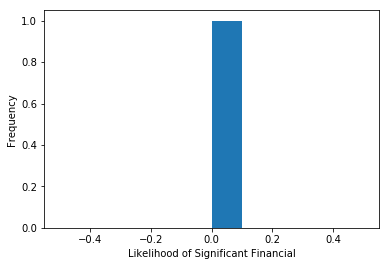

In [28]:
evaluate(model, X_test, y_test)

C:\Users\Andrew Mao\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


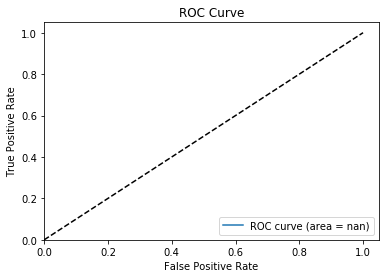

In [21]:
plot_roc(model.predict_proba(X_test)[:,1], y_test)